<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio EDA y Gestión de Nulos

AutoRenew, una empresa líder en la venta de coches de segunda mano, te ha contratado para desarrollar un modelo predictivo que estime el precio de los vehículos usados. Este modelo ayudará a la empresa a mejorar sus estrategias de ventas, marketing y optimización del inventario. Para ello, cuentas con un conjunto de datos que contiene información detallada sobre diversas características de los coches usados. Sin embargo, como es común en conjuntos de datos reales, encontrarás valores nulos y necesitarás realizar un análisis exploratorio para identificar patrones, correlaciones y posibles anomalías.

 En este laboratorio, tu tarea es realizar un análisis exploratorio de los datos (EDA) y gestionar los valores nulos que encuentres. Este es solo el primer paso de un proyecto que se desarrollará durante toda la semana, en el que usarás este mismo conjunto de datos para practicar diferentes fases del preprocesamiento.

**Columnas del conjunto de datos:**

- **dateCrawled**: Fecha y hora en que se recolectaron los datos del coche.

- **name**: Nombre del anuncio, generalmente incluye la marca y el modelo del coche.

- **seller**: Tipo de vendedor (particular o concesionario).

- **offerType**: Tipo de oferta (venta o subasta).

- **price**: Precio del coche en la moneda local.

- **abtest**: Campo utilizado para pruebas A/B, indicando diferentes versiones del sitio web o anuncio.

- **vehicleType**: Tipo de vehículo (sedán, SUV, hatchback, etc.).

- **yearOfRegistration**: Año de registro del coche.

- **gearbox**: Tipo de caja de cambios (manual o automática).

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **model**: Modelo específico del coche.

- **kilometer**: Kilometraje total del coche.

- **monthOfRegistration**: Mes de registro del coche.

- **fuelType**: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- **brand**: Marca del coche.

- **notRepairedDamage**: Indica si el coche tiene daños no reparados.

- **dateCreated**: Fecha de creación del anuncio.

- **nrOfPictures**: Número de fotos en el anuncio.

- **postalCode**: Código postal de la ubicación del coche.

- **lastSeen**: Última fecha y hora en que el anuncio fue visto.

**Instrucciones:**

1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   
2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

**Nota:** Este laboratorio es el primer paso de una serie de actividades que realizarás esta semana utilizando el mismo conjunto de datos. Asegúrate de documentar bien tu trabajo, ya que lo utilizarás como base para los siguientes ejercicios.


In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../datos/autorenew.csv")

- La columna kms tiene varios valores atípico, hay que categorizarla OK
- Hay que categorizar la columna código postal
- La columna "Vehicletype" tiene muchos nulos, al igual que gearbox, model, fueltype y not repaired damage
- La columna nrOfPictures no aporta nada
- La columna PowerCV tiene muchos valores sin sentido, al igual que la columna price


In [3]:
#separamos categóricas:

def separar_categorias(dataframe):
   return dataframe.select_dtypes(include = np.number), dataframe.select_dtypes(include = "O")
   

In [4]:
df.dtypes

dateCrawled             object
name                    object
seller                  object
offerType               object
price                    int64
abtest                  object
vehicleType             object
yearOfRegistration       int64
gearbox                 object
powerCV                float64
model                   object
kilometer                int64
monthOfRegistration      int64
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
nrOfPictures             int64
postalCode               int64
lastSeen                object
dtype: object

In [5]:
#Categorizamos kilometer y código postal
df["kilometer"] = df["kilometer"].astype("object") 
df["postalCode"] = df["postalCode"].astype("object")
#Creamos columnas para poder categorizar "dateCrawled"
df["dateCrawled"] = pd.to_datetime(df["dateCrawled"])
df["dateCrawled"].dtypes

df["yrCrawled"] = df["dateCrawled"].dt.year
df["monthCrawled"] = df["dateCrawled"].dt.month

df["yrCrawled"] = df["yrCrawled"].astype("object")
df["monthCrawled"] = df["monthCrawled"].astype("object")

#Arreglamos año de registro
df = df[(df["yearOfRegistration"] < 2024) & (df["yearOfRegistration"] > 1900)]

df["yearOfRegistration"] = df["yearOfRegistration"].astype("object")

#Arreglamos mes de registro 
df["monthOfRegistration"] = df["monthOfRegistration"].astype("object")

#Dropeamos la columna numero de fotos
df = df.drop(columns = "nrOfPictures")
#Cambiamos la potencia 0 por nulos
df["powerCV"] = pd.to_numeric(df["powerCV"], errors='coerce')  # Converts '0' to NaN automatically

#Cambiamos el  precio 0 por nulos
filtro_precio = (df["price"] == 0)
df.loc[filtro_precio, "price"] = np.nan

#Arreglamos caballos
filtro_caballos = (df["powerCV"] > 1200)
df.loc[filtro_caballos, "powerCV"] = np.nan

filtro_caballos_low = (df["powerCV"] < 12)
df.loc[filtro_caballos_low, "powerCV"] = np.nan


#Outliers diferenciar
#En algunas categóricas hay que crear nueva categoría para los nulos

#Dividimos por categorías y números
df_num,df_cat = separar_categorias(df)

In [6]:
df_num["price"].describe()

count    3.606000e+05
mean     1.781102e+04
std      3.641913e+06
min      1.000000e+00
25%      1.250000e+03
50%      3.000000e+03
75%      7.490000e+03
max      2.147484e+09
Name: price, dtype: float64

In [7]:
df.isna().sum()/df.shape[0]*100

dateCrawled             0.000000
name                    0.000000
seller                  0.000000
offerType               0.000000
price                   2.893797
abtest                  0.000000
vehicleType            35.972112
yearOfRegistration      0.000000
gearbox                 5.403317
powerCV                11.095582
model                   5.494606
kilometer               0.000000
monthOfRegistration     0.000000
fuelType                8.953914
brand                   0.000000
notRepairedDamage      19.363074
dateCreated             0.000000
postalCode              0.000000
lastSeen                0.000000
yrCrawled               0.000000
monthCrawled            0.000000
dtype: float64

In [8]:
df[df.duplicated()]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,yrCrawled,monthCrawled
179448,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,private,offer,1799.0,test,coupe,1999,automatic,190.0,...,20000,7,petrol,mercedes_benz,no,2016-03-08 00:00:00,89518,2016-03-09 09:46:57,2016,3
242556,2016-03-28 00:56:10,Suzuki_Ignis,private,offer,1000.0,control,small car,2002,manually,82.0,...,150000,1,petrol,suzuki,no,2016-03-28 00:00:00,66589,2016-03-28 08:46:21,2016,3
270719,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,private,offer,4699.0,test,coupe,2003,automatic,215.0,...,125000,6,petrol,mercedes_benz,yes,2016-04-03 00:00:00,75196,2016-04-07 09:44:54,2016,4
341474,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,private,offer,1999.0,control,combi,2001,manually,129.0,...,150000,7,diesel,volkswagen,no,2016-03-18 00:00:00,36391,2016-03-18 18:46:15,2016,3


In [9]:
df_num.dtypes

price      float64
powerCV    float64
dtype: object

In [10]:
df_cat.head(1)

,name,seller,offerType,abtest,vehicleType,yearOfRegistration,gearbox,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,yrCrawled,monthCrawled
0,Golf_3_1.6,private,offer,test,NaN,1993,manually,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,2016,3


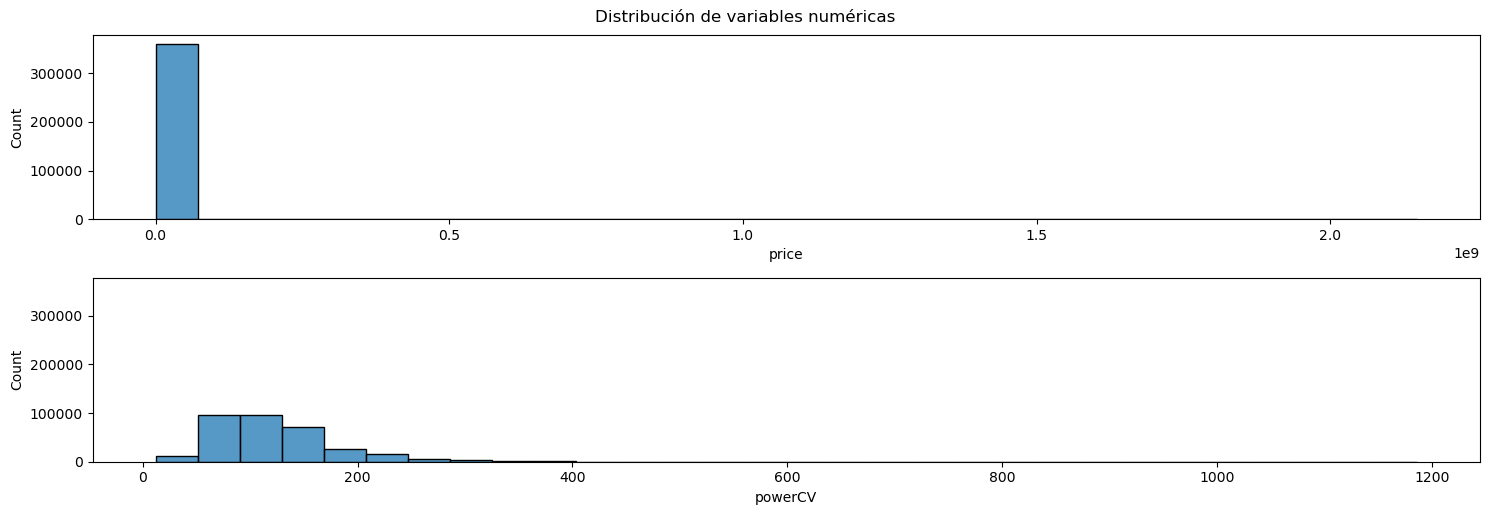

In [11]:

# Visualizamos
fig, axes = plt.subplots(nrows=2, ncols=math.ceil(len(df_num.columns)/2), figsize=(15, 5), sharey=True)
axes = axes.flat  

for indice, columna in enumerate(df_num.columns):
    sns.histplot(x=columna, data=df_num, ax=axes[indice], bins=30)
    
plt.tight_layout()
fig.suptitle("Distribución de variables numéricas", y=1.02)  
plt.show()


#Vemos que la variable precio se centra en torno al cero. En la variable año de registro existen outliers sin sentido, al igual que en CV. Kilómetros es una variable categórica al igual que month of registration.

In [12]:
#Tratamos categoricas
df_cat.head()
df_cplot = df_cat.copy()

df_cplot.drop(columns=["yearOfRegistration", "name", "model", "brand", "dateCreated", "postalCode", "lastSeen"], inplace=True)


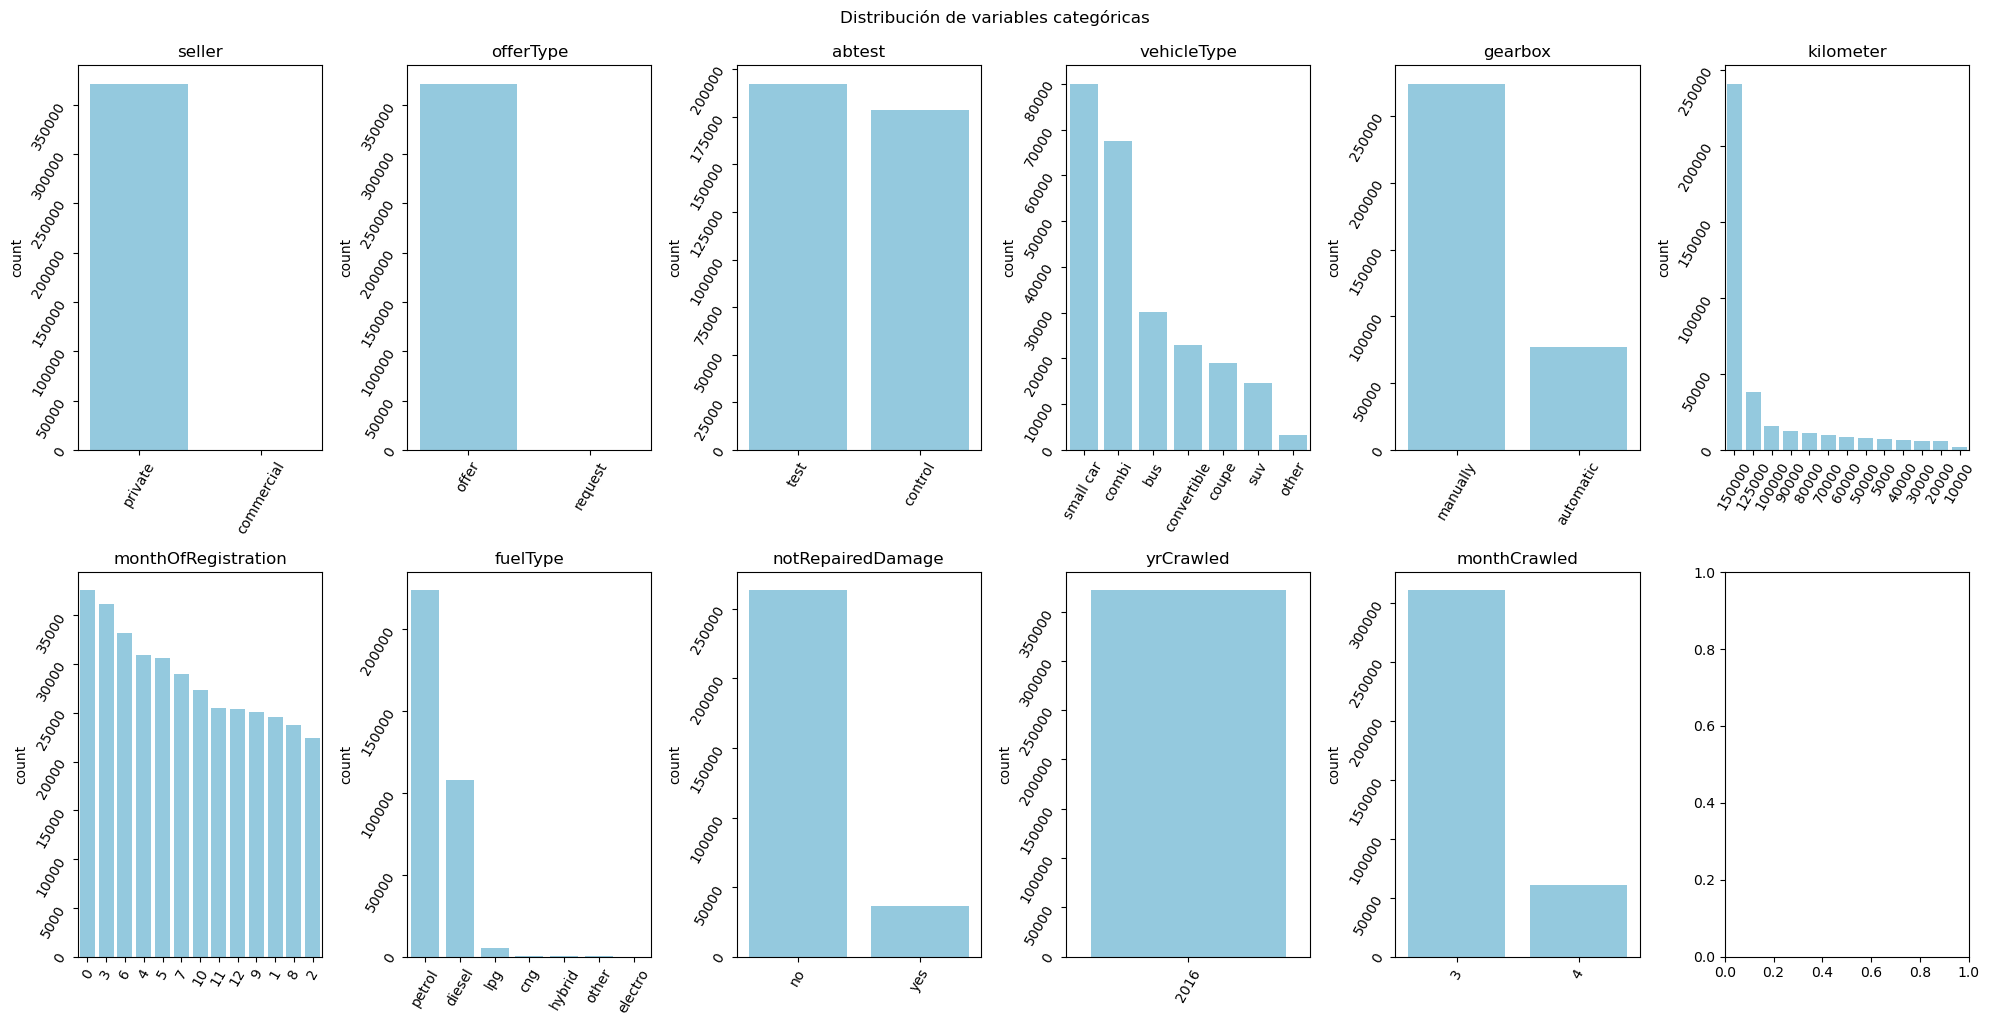

In [13]:

# Definir un color para los gráficos
color = "skyblue"  # Puedes cambiar este color

# Crear los subplots
fig, axes = plt.subplots(2, math.ceil(len(df_cplot.columns) / 2), figsize=(20, 10))
axes = axes.flat

for indice, columna in enumerate(df_cplot.columns):
    sns.countplot(x=columna, data=df_cplot, order=df_cplot[columna].value_counts().index,
                  ax=axes[indice], color = color)
    axes[indice].tick_params(rotation=60)
    axes[indice].set_title(columna)
    axes[indice].set(xlabel=None)

plt.tight_layout()
fig.suptitle("Distribución de variables categóricas", y=1.02)  # Ajustar posición del título
plt.show()


In [14]:
df_num["powerCV"] = df_num["powerCV"].replace("0.0", np.nan)

In [15]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,yrCrawled,monthCrawled
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480.0,test,NaN,1993,manually,NaN,...,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,2016,3
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011,manually,187.0,...,125000,5,diesel,audi,yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,2016,3
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004,automatic,161.0,...,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,2016,3
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,2001,manually,74.0,...,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,2016,3
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,2008,manually,68.0,...,90000,7,diesel,skoda,no,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,2016,3


In [16]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=5)  
df_knn = knn.fit_transform(df_num)

nuevas_columnas_knn = [col + "_knn" for col in df_num.columns]
df_num_knn = pd.DataFrame(data = df_knn, columns= nuevas_columnas_knn)


In [17]:
df_num_knn.isna().sum()

price_knn      0
powerCV_knn    0
dtype: int64

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd


imputer_iterative = IterativeImputer(max_iter=20, random_state=42)

iterative_imputado = imputer_iterative.fit_transform(df_num)

nuevas_columnas_iter = [col + "_iterative" for col in df_num.columns]

df_num_iter = pd.DataFrame(data = iterative_imputado, columns= nuevas_columnas_iter)



In [19]:
df_num_iter.isna().sum()

price_iterative      0
powerCV_iterative    0
dtype: int64

In [20]:
df_done = pd.concat([df_num.reset_index(),df_num_iter.reset_index(),df_num_knn.reset_index()], axis = 1)

In [21]:
df_done.isna().sum()

index                    0
price                10746
powerCV              41203
index                    0
price_iterative          0
powerCV_iterative        0
index                    0
price_knn                0
powerCV_knn              0
dtype: int64

In [22]:
df_done.to_csv("../../datos/df_numericas_nonulos.csv") 

In [25]:
df_done.columns

Index(['index', 'price', 'powerCV', 'index', 'price_iterative',
       'powerCV_iterative', 'index', 'price_knn', 'powerCV_knn'],
      dtype='object')

In [23]:
df_done.shape

(371346, 9)

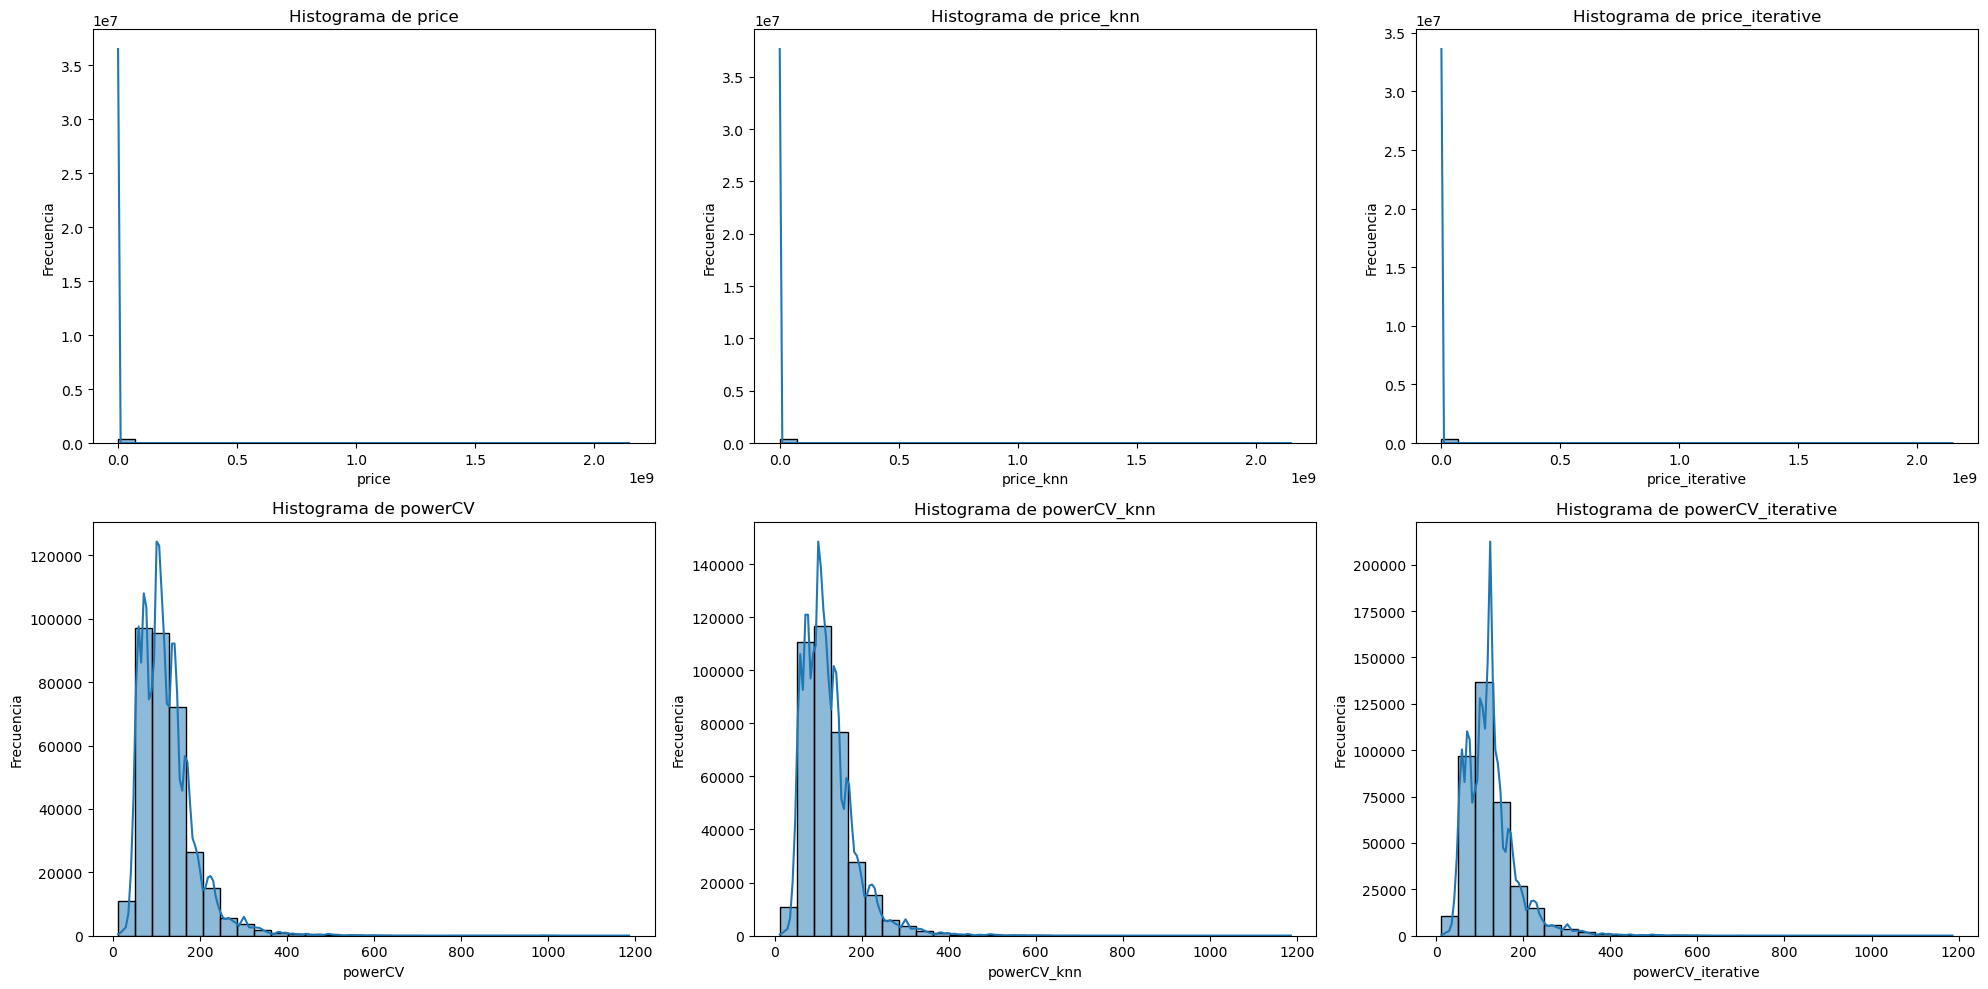

In [27]:
#Comparamos entre métodos. Vemos que ambos nos devuelven 0 nulos en las categorías correspondientes, y que el método knn da unos valores ligeramente superiores
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flat  

columnas_plotear = ["price","price_knn","price_iterative","powerCV", "powerCV_knn", "powerCV_iterative"]


for indice, columna in enumerate(columnas_plotear):
    sns.histplot(data=df_done, x=columna, kde=True, ax=axes[indice], bins = 30)
    axes[indice].set_title(f'Histograma de {columna}')  
    axes[indice].set_xlabel(columna)  
    axes[indice].set_ylabel('Frecuencia') 

plt.tight_layout()
plt.show()


Las gráficas superiores nos dan información sobre los diferentes procesos de imputación de nulos empleados. La limpieza de los precios nos ha permitido eliminar muchos valores "0" y sustituirlos por nulos, para posteriormente aplicar métodos de imputación que permitan unos datos más normalizados. Ahora mismo es difícil discernir diferencias debido a la presencia de outliers que generan ruido. Sin embargo compararemos los describe:

Vemos que el knn nos da algunos valores extra en la zona media de la distribución

In [35]:

print("\n", df_done["price"].describe())
print("\n", df_done["price_knn"].describe())
print("\n", df_done["price_iterative"].describe())


 count    3.606000e+05
mean     1.781102e+04
std      3.641913e+06
min      1.000000e+00
25%      1.250000e+03
50%      3.000000e+03
75%      7.490000e+03
max      2.147484e+09
Name: price, dtype: float64

 count    3.713460e+05
mean     1.874172e+04
std      3.657383e+06
min      1.000000e+00
25%      1.250000e+03
50%      3.150000e+03
75%      7.600000e+03
max      2.147484e+09
Name: price_knn, dtype: float64

 count    3.713460e+05
mean     1.759226e+04
std      3.588850e+06
min     -1.361514e+05
25%      1.249000e+03
50%      3.100000e+03
75%      7.777000e+03
max      2.147484e+09
Name: price_iterative, dtype: float64
